 ** **LAB 3**

---



Let x(t) = 1/2A for x in [-A,A[ and 0 elsewhere.

Question 1- Plot x

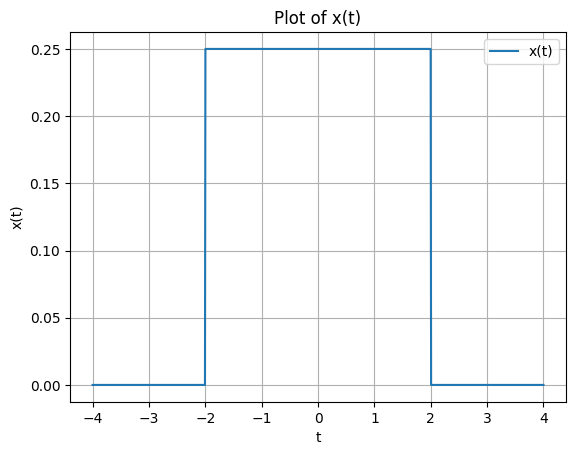

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


A = 2


t = np.linspace(-4, 4, 1000)


x = np.where(np.logical_and(t >= -A, t < A), 1 / (2 * A), 0)


plt.plot(t, x, label='x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Plot of x(t)')
plt.grid(True)
plt.legend()
plt.show()


Question 2-Calculate the Fourier Transform using fft function and plot it

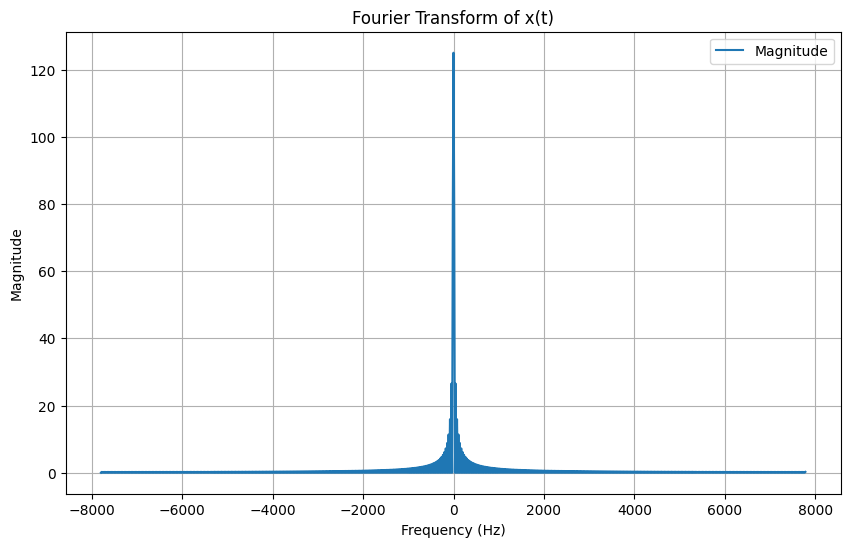

In [ ]:
A = 2
t = np.linspace(-4, 4, 1000)


x = np.where(np.logical_and(t >= -A, t < A), 1 / (2 * A), 0)


fft_result = np.fft.fft(x)
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])


fft_result = np.fft.fftshift(fft_result)
fft_freq = np.fft.fftshift(fft_freq)


sampling_rate = 1 / (t[1] - t[0])
fft_freq_hz = fft_freq * sampling_rate


plt.figure(figsize=(10, 6))
plt.plot(fft_freq_hz, np.abs(fft_result), label='Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of x(t)')
plt.grid(True)
plt.legend()
plt.show()

Question 3- Calculte analytically the Fourier transform and plot it.
Compare the results the results with the results using fft function.



F(ω)=2A*sinc(2Aω)
Where F(ω) is the Fourier transform in the frequency domain.
ω is the angular frequency.
1/2A is a sinc function.

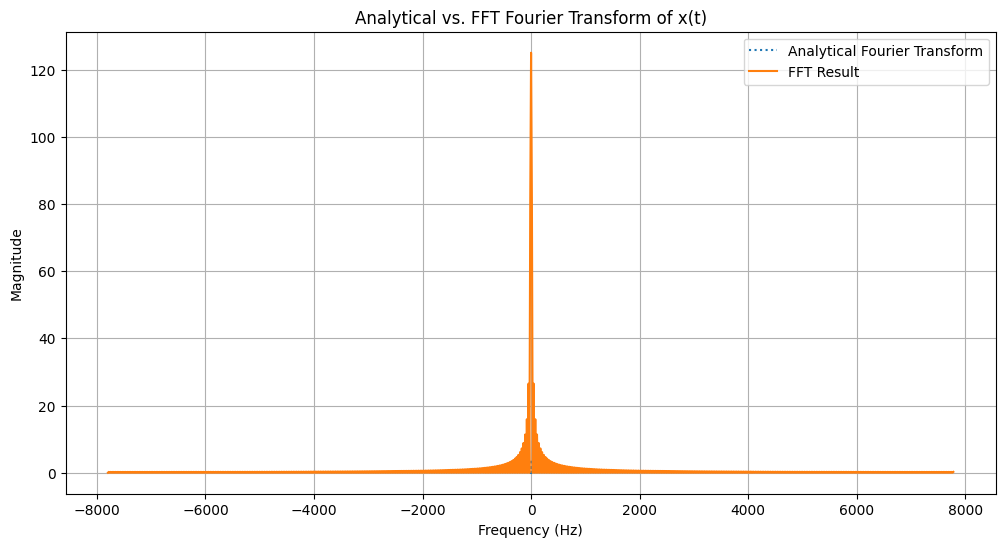

In [ ]:
A = 2

omega = np.linspace(-8, 8, 1000)

analytical_result = 2 * A * np.sinc(2 * A * omega)

t = np.linspace(-4, 4, 1000)

x = np.where(np.logical_and(t >= -A, t < A), 1 / (2 * A), 0)

fft_result = np.fft.fft(x)
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])
fft_result = np.fft.fftshift(fft_result)
fft_freq = np.fft.fftshift(fft_freq)
sampling_rate = 1 / (t[1] - t[0])
fft_freq_hz = fft_freq * sampling_rate

plt.figure(figsize=(12, 6))
plt.plot(omega, np.abs(analytical_result), label='Analytical Fourier Transform', linestyle='dotted')
plt.plot(fft_freq_hz, np.abs(fft_result), label='FFT Result')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Analytical vs. FFT Fourier Transform of x(t)')
plt.grid(True)
plt.legend()
plt.show()


Question 4-
Plot the Dirac comb


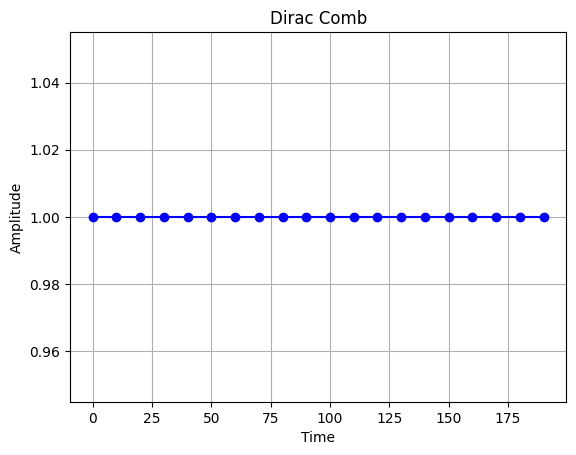

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Dirac comb
period = 10  # Period of the comb
amplitude = 1.0  # Amplitude of the impulses
num_impulses = 20  # Number of impulses

# Create the time vector
t = np.arange(0, num_impulses * period, period)
dirac_comb = amplitude * np.ones_like(t)

# Plot the Dirac comb using plot
plt.plot(t, dirac_comb, 'bo-')  # 'bo-' specifies blue circles connected by lines
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Dirac Comb')
plt.grid(True)
plt.show()


Question 5- Let Xp the result of convolution of x by Dirac comb of period T >= 2.A. Calculate the convolution and plot the result

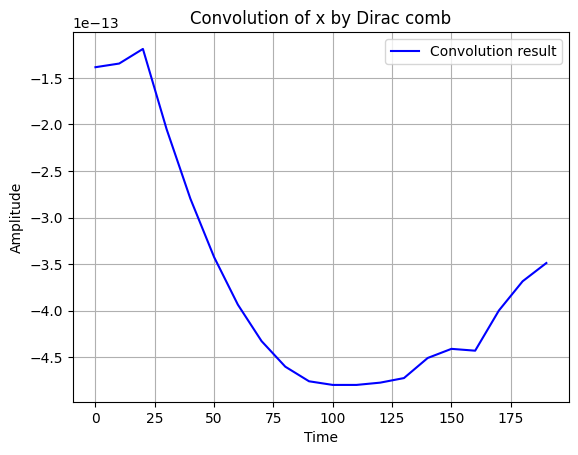

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Dirac comb
period = 10  # Period of the comb
amplitude = 1.0  # Amplitude of the impulses
num_impulses = 20  # Number of impulses

# Create the time vector
t = np.arange(0, num_impulses * period, period)
dirac_comb = amplitude * np.ones_like(t)

# Create the input signal
x = np.sin(2 * np.pi * t)

# Convolution of the input signal with the Dirac comb
Xp = np.convolve(x, dirac_comb, mode='same')

# Plot the result
plt.plot(t, Xp, 'b-', label='Convolution result')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Convolution of x by Dirac comb')
plt.grid(True)
plt.legend()
plt.show()

Question 6- Calculate and plot the Fourier Transform of the resulting convolution product

---



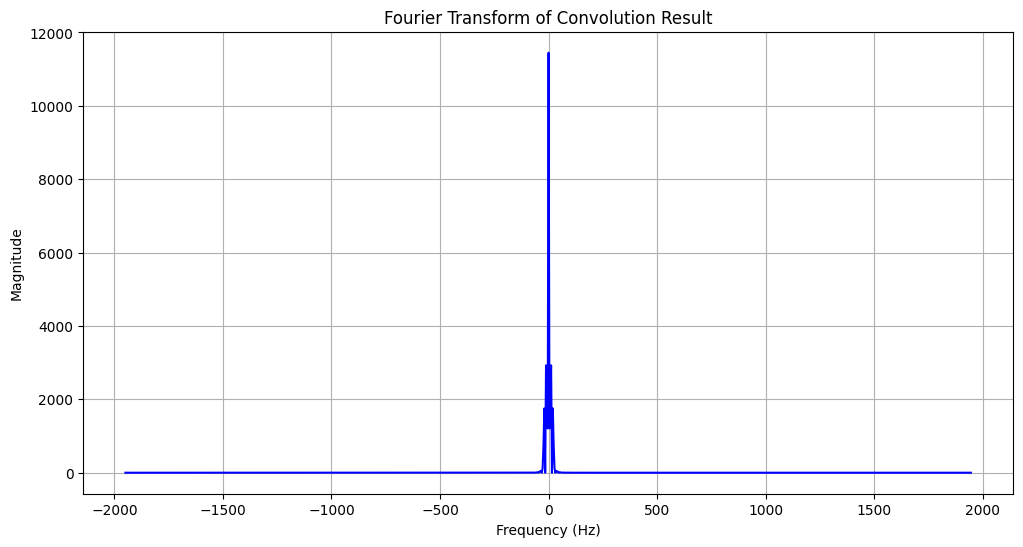

In [ ]:
import numpy as NP
import matplotlib.pyplot as plt

A = 2
T = 6
amplitude = 1
t = np.linspace(-8, 8, 1000)
x = np.where(np.logical_and(t >= -A, t < A), 1 / (2 * A), 0)
dirac_comb = np.zeros_like(t)

for n in range(-10, 11):
    dirac_comb += amplitude * np.sinc(t - n * T)

convolution_result = np.fft.ifft(np.fft.fft(x) * np.fft.fft(dirac_comb))
convolution_result = np.real(convolution_result)

fft_result = np.fft.fft(convolution_result)
fft_freq = np.fft.fftfreq(len(t), t[1] - t[0])
fft_result = np.fft.fftshift(fft_result)
fft_freq = np.fft.fftshift(fft_freq)
sampling_rate = 1 / (t[1] - t[0])
fft_freq_hz = fft_freq * sampling_rate

plt.figure(figsize=(12, 6))
plt.plot(fft_freq_hz, np.abs(fft_result), color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Convolution Result')
plt.grid(True)
plt.show()

Question 7- Calculate anatically to verify the result

F{ x(t) } = sinc(ωA)

F{ δ_T(t) } = ∑ δ(ω - n(2π/T))

F{ x(t) * δ_T(t) } = F{ x(t) } * F{ δ_T(t) }

[sinc(ωA)] * ∑ δ(ω - n(2π/T))

F{ x(t) * δ_T(t) } = ∑ sinc((ω - n(2π/T))A)

Question 8- What happens when A->0?

In [ ]:
In summary, when A approaches 0, the rectangular pulse becomes a Dirac delta function (impulse), and the Dirac comb becomes a dense, continuous distribution of Dirac delta functions. This behavior is fundamental in signal processing and Fourier analysis, as it represents idealized impulses and sampling in continuous-time systems.

Rectangular pulses tend towards the Dirac comb